In [463]:
import pandas as pd
import numpy as np 
import yfinance as yf

In [464]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN,LSTM,Dense,Dropout

In [465]:
stocks = yf.Ticker("goog")

In [466]:
scale = MinMaxScaler(feature_range=(0,1))
# scale = StandardScaler()
prices = np.array(stocks.history(period='5y')['Open'])
prices = scale.fit_transform(prices.reshape(-1,1))

In [467]:
x = []
y = []

In [468]:
steps = 30

In [469]:
for i in range(0,len(prices)-steps-1):
    x.append(prices[i:i+steps,0])
    y.append(prices[i+steps,0])
x = np.array(x)
x = x.reshape(x.shape[0],x.shape[1],1)

y = np.array(y)

In [470]:
split = 0.2

In [471]:
xtrain, xtest = x[:len(x)-int(split * len(x))], x[len(x)-int(split * len(x)):]
ytrain, ytest = y[:len(y)-int(split * len(y))], y[len(y)-int(split * len(y)):]

In [472]:
model = Sequential()
model.add(SimpleRNN(100,input_shape = (x.shape[1],1)))
model.add(Dropout(0.6))
model.add(Dense(1))

In [473]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [474]:
history = model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5


31/31 [==============================] - 2s 30ms/step - loss: 0.0523
Epoch 2/5
31/31 [==============================] - 1s 24ms/step - loss: 0.0120
Epoch 3/5
31/31 [==============================] - 1s 24ms/step - loss: 0.0092
Epoch 4/5
31/31 [==============================] - 1s 24ms/step - loss: 0.0081
Epoch 5/5
31/31 [==============================] - 1s 25ms/step - loss: 0.0076


In [475]:
ypred = model.predict(xtest)

8/8 [==============================] - 0s 6ms/step


### Evaluation metrics

In [476]:
from sklearn.metrics import *

ytest_eval = scale.inverse_transform(ytest.reshape(-1,1))
ypred_eval = scale.inverse_transform(ypred.reshape(-1,1))

print("MSE is {}".format(mean_squared_error(ytest_eval,ypred_eval)))

MSE is 11.952542921186337


In [477]:
future_pred_len = 5

In [478]:
last_seq = x[len(x)-int(split * len(x)):].reshape(-1,steps)[-1]
future_pred = []
for i in range(0,future_pred_len):
    pred = model.predict(last_seq.reshape(1,steps,1))
    # print(scale.inverse_transform(pred))
    future_pred.append((pred))
    last_seq = np.hstack((last_seq[1:], pred.reshape(-1)))
future_pred = np.array(future_pred)

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 20ms/step


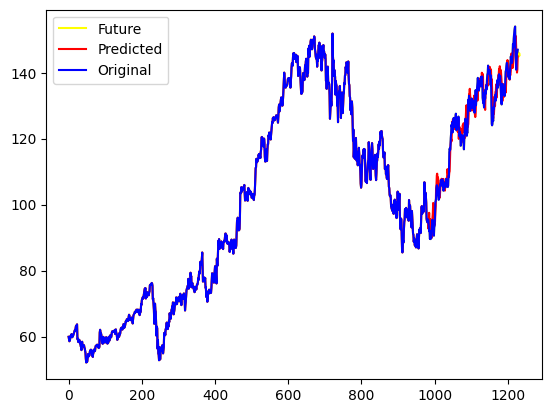

In [479]:
import matplotlib.pyplot as plt 

plt.plot(np.vstack((scale.inverse_transform(y.reshape(-1,1)),scale.inverse_transform(future_pred.reshape(-1,1)))), color = 'yellow', label = 'Future')
plt.plot(np.vstack((scale.inverse_transform(ytrain.reshape(-1,1)),scale.inverse_transform(ypred.reshape(-1,1)))), color = 'red', label = 'Predicted')
plt.plot(np.vstack((scale.inverse_transform(ytrain.reshape(-1,1)),scale.inverse_transform(ytest.reshape(-1,1)))), color = 'blue', label = 'Original')
plt.legend()

In [480]:
scale.inverse_transform(future_pred.reshape(-1,1))

array([[144.94176],
       [145.04105],
       [144.89896],
       [145.92592],
       [145.29457]], dtype=float32)